# Course Stats

In [1]:
from bs4 import BeautifulSoup
import requests 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
url = 'https://results.golfstat.com/public/leaderboards/gsnav.cfm?pg=stats&tid=23118&statsType=c'
response = requests.get(url).text
soup = BeautifulSoup(response)

In [7]:
headings = soup.find_all('div', attrs={"style":"display:inline-block; border:1px solid silver;text-align:center;width:2.5em;background-color:#05643A;color:#FFF;"})

In [12]:
headings_list = [i.get_text() for i in headings][:11]

In [14]:
headings_list

['HOL', 'RNK', 'PAR', 'YDG', 'AVG', 'EAG', 'BIR', 'PAR', 'BOG', 'DBL', 'OTH']

In [39]:
headings_list.insert(5, 'SC')

In [29]:
scores = soup.find_all('div', attrs={"style":"clear:both;;white-space:nowrap;"})

In [32]:
score_rows = [i.get_text() for i in scores]

In [35]:
score_list = [score.split('\n')[1:13] for score in score_rows]

In [43]:
df = pd.DataFrame(score_list, columns= headings_list)

In [45]:
df = df.astype(float)

In [74]:
!ls ../../../../Desktop/golfStats/

In [75]:
#df[:18].to_csv(path_or_buf='../../../../Desktop/golfStats/totRoundsRLtourny.csv')

In [76]:
#df[18:36].to_csv(path_or_buf='../../../../Desktop/golfStats/RLtournyRd1.csv')

In [77]:
#df[36:].to_csv(path_or_buf='../../../../Desktop/golfStats/RLtournyRd2.csv')

In [57]:
sns.set_style("darkgrid")
sns.set(font_scale=1.5)

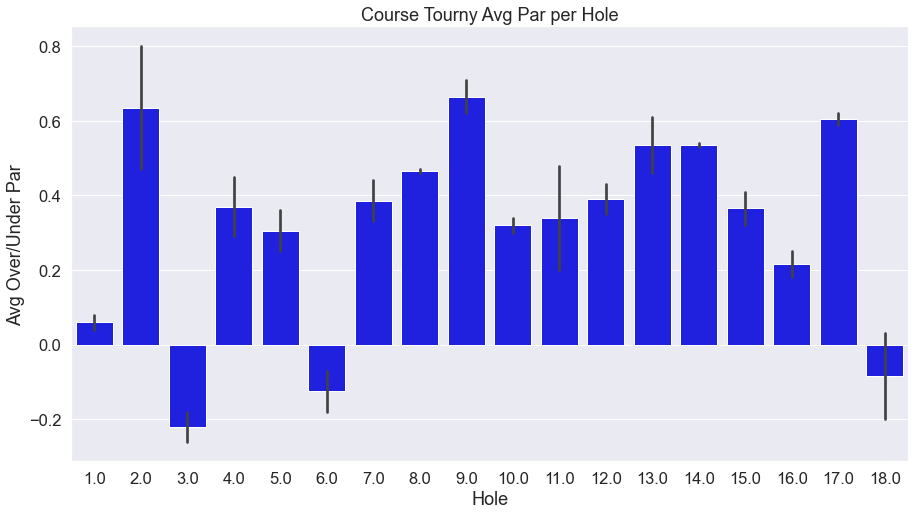

In [79]:
plt.figure(figsize=(15,8))
sns.barplot(x=df[18:].HOL , y=df[18:].SC, color='blue')
plt.ylabel('Avg Over/Under Par')
plt.xlabel('Hole')
plt.title('Course Tourny Avg Par per Hole');
#plt.savefig('../../../../Desktop/golfStats/RLtournyAvgPar.png')

# Winning team stats

In [80]:
from selenium import webdriver

In [81]:
import time

In [82]:
options = webdriver.ChromeOptions()
options.add_argument('--ignore-certificate-errors')
options.add_argument('--incognito')
options.add_argument('--headless')
driver = webdriver.Chrome("/Users\dcv_2\Desktop\chromedriver_win32\chromedriver", options=options)
#"C:\Users\dcv_2\Desktop\chromedriver_win32\chromedriver.exe"

In [83]:
driver.get("https://results.golfstat.com/public/leaderboards/gsnav.cfm?pg=team&tid=23118")

In [86]:
time.sleep(1)
click_button = driver.find_element_by_link_text('Babson College')
click_button.click()

time.sleep(2)
click_round1 = driver.find_element_by_link_text('1')
click_round1.click()

In [87]:
page_source = driver.page_source

In [88]:
sp = BeautifulSoup(page_source)

In [105]:
site = sp.find_all('div')

In [111]:
players = site[4].get_text().split('\n')[133:175]

In [112]:
values = []

In [113]:
for player in players:
    if player == "":
        continue
    else:
        values.append(player)

In [122]:
realValues = values[1:]

In [146]:
parHeadings = list(values[0])

In [147]:
indexes = [9, 10, 20,21,22,23]
for index in sorted(indexes, reverse=True):
    
    del parHeadings[index]

In [124]:
playerScores = [x for x in realValues if realValues.index(x) in [1,5,9,13,17,21]]

In [130]:
scoresList = []

In [131]:
for score in playerScores:
    scoresList.append(list(map(int, score)))

In [134]:
for score in scoresList:
    indexes = [9, 10, 20,21,22,23]
    for index in sorted(indexes, reverse=True):
        del score[index]

In [150]:
scoresList.append(parHeadings)

In [153]:
colNames = ['p1', 'p2', 'p3', 'p4', 'p5', 'par']

In [155]:
playerDict = dict(zip(colNames, scoresList))

In [157]:
babson = pd.DataFrame(playerDict)

In [163]:
babson['hole'] = [i for i in range(1,19)]

In [167]:
babson['par'] = babson['par'].astype(int)

In [179]:
babson['averagePar'] = babson[['p1', 'p2', 'p3', 'p4', 'p5']].sum(axis=1)/5

In [191]:
babson['diff'] = babson['averagePar'] - babson['par']

In [203]:
#babson.to_csv(path_or_buf='../../../../Desktop/golfStats/babsonRd1.csv')

In [204]:
babson

,hole,p1,p2,p3,p4,p5,par,averagePar,diff
0,1,5,4,5,6,4,5,4.8,-0.2
1,2,4,4,4,4,4,4,4.0,0.0
2,3,4,5,5,4,5,5,4.6,-0.4
3,4,3,3,3,3,3,3,3.0,0.0
4,5,4,4,5,4,4,4,4.2,0.2
5,6,4,3,5,4,4,4,4.0,0.0
6,7,4,3,5,5,5,4,4.4,0.4
7,8,3,3,4,4,2,3,3.2,0.2
8,9,5,3,4,4,5,4,4.2,0.2
9,10,4,4,5,4,3,4,4.0,0.0
